<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


In this lab, I will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.5 MB/s eta 0:00:00


In [4]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 157.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 152.0 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [5]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-10-14 19:12:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.9MB/s    in 2.3s    

2025-10-14 19:12:25 (66.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [8]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



Median Job Satisfaction Scores by Age Group:
                    JobSatPoints_6  JobSatPoints_7
Age                                               
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0
Prefer not to say             10.0             7.0
Under 18 years old             1.5             5.0


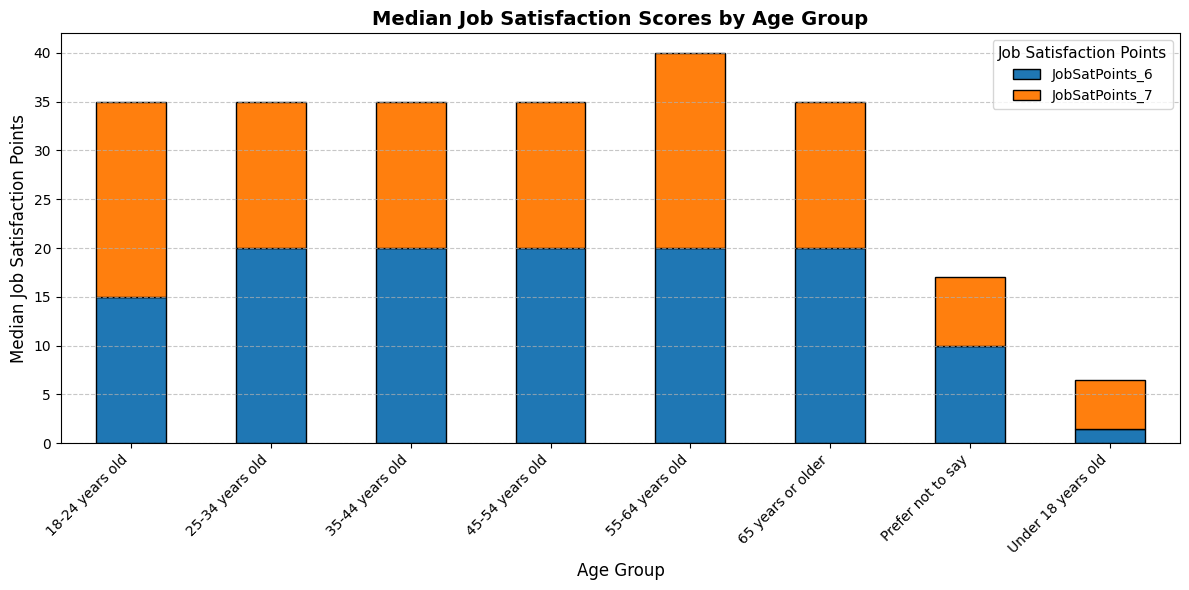

In [9]:
# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
median_scores = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().sort_index()

# Display the median values
print("Median Job Satisfaction Scores by Age Group:")
print(median_scores)


# Plot stacked bar chart with enhanced layout
ax = median_scores.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)


# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance labels and title
plt.title("Median Job Satisfaction Scores by Age Group", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Job Satisfaction Points", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Job Satisfaction Points", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


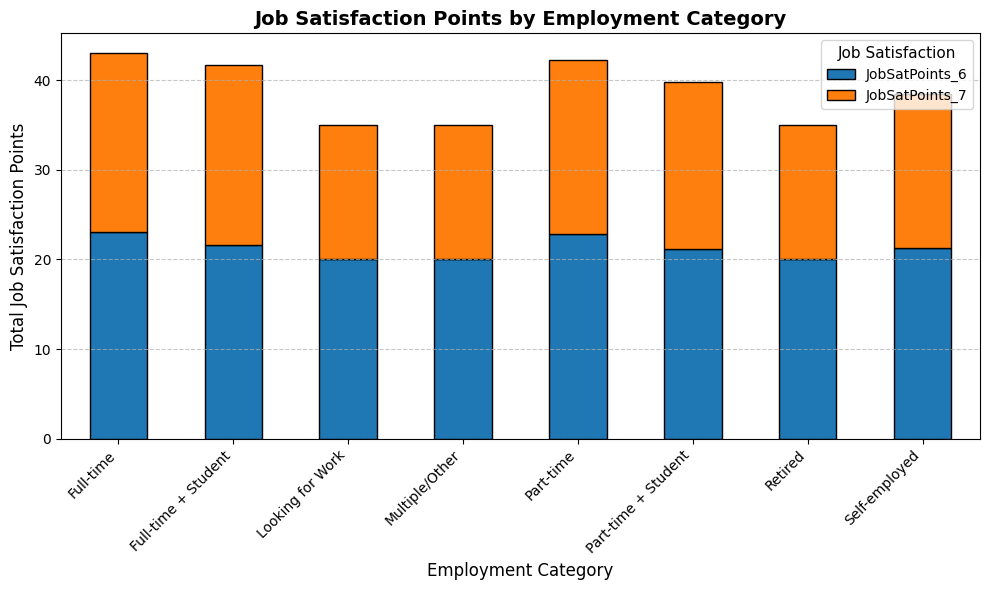

In [10]:
# For this chart I will use the column "EmploymentCategory" 
# This column was created on a previous lab and saved as part of the "cleaned_data_lab13" dataset. 
df_empcat = pd.read_csv('/resources/DA0321EN/lab/module3/cleaned_data_Lab13.csv')

# Group by EmploymentCategory and sum JobSatPoints_6 and JobSatPoints_7
df_empcat_grouped = df_empcat.groupby('EmploymentCategory')[['JobSatPoints_6', 'JobSatPoints_7']].mean()

# Plot stacked bar chart
ax = df_empcat_grouped.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,6), 
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance labels
plt.title('Job Satisfaction Points by Employment Category', fontsize=14, weight='bold')
plt.ylabel('Total Job Satisfaction Points', fontsize=12)
plt.xlabel('Employment Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Job Satisfaction', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()



### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [11]:
# Back to using the standard dataset
df = pd.read_csv("survey-data.csv")

# Check unique values in the Age column
unique_ages = df['Age'].unique()
print("Unique Age values:", unique_ages)

print("We do not have data for respondents aged 30-35. Will analyse age group 25-34 years old.")

Unique Age values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
We do not have data for respondents aged 30-35. Will analyse age group 25-34 years old.


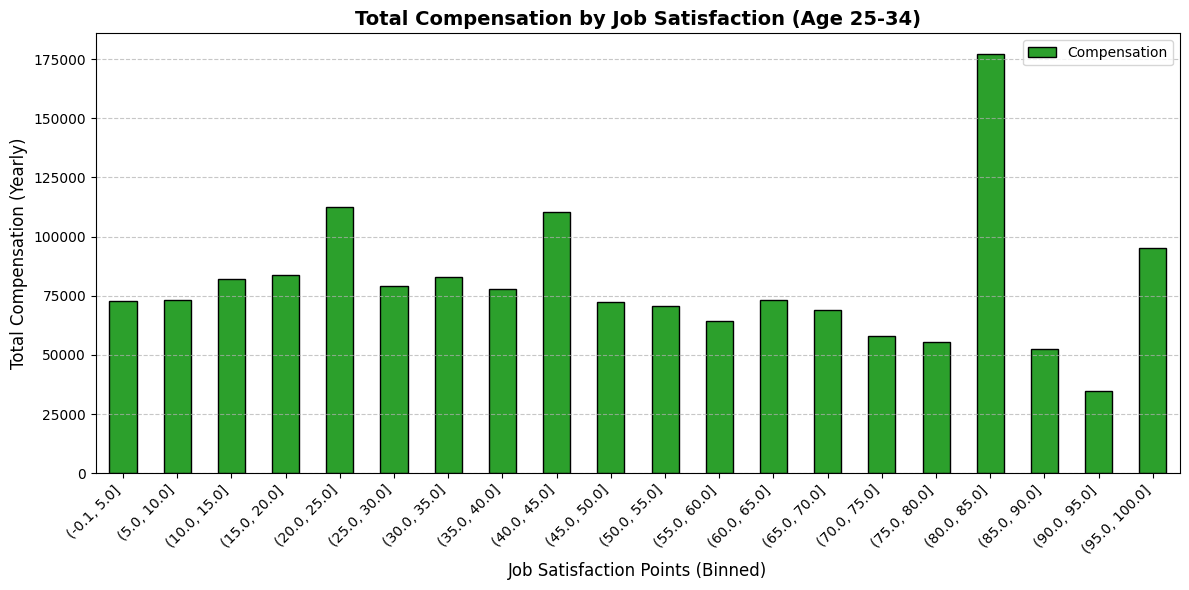

In [12]:
# Filter for respondents aged 25-34
df_25_34 = df[df['Age'] == '25-34 years old'].copy()  # Make a copy to be safe

# Create 20 bins for JobSatPoints_6 using .loc
df_25_34.loc[:, 'JobSat_bin'] = pd.cut(df_25_34['JobSatPoints_6'], bins=20)

# Group by the binned JobSatPoints_6 and sum ConvertedCompYearly
df_grouped = df_25_34.groupby('JobSat_bin',observed=False)[['ConvertedCompYearly']].mean()

# Plot bar chart
ax = df_grouped.plot(
    kind='bar',
    stacked=False,
    figsize=(12,6),
    color='#2ca02c',
    edgecolor='black'
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance labels and title
plt.title("Total Compensation by Job Satisfaction (Age 25-34)", fontsize=14, weight='bold')
plt.xlabel("Job Satisfaction Points (Binned)", fontsize=12)
plt.ylabel("Total Compensation (Yearly)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(["Compensation"], fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [11]:
# Check unique values for JobSatPoints_6
unique_job_sat = df['JobSatPoints_6'].unique()
print("Unique JobSatPoints_6 values:", unique_job_sat)

# We can see that JobSatPoints_6 goes from 0 to 100. Since compensation is in another order of magnitude,
# when stacking these variables we won't be able to see JobSatPoints_6.
# To address this problem I will use a dual-axis chart.

Unique JobSatPoints_6 values: [   nan   0.    25.    30.    60.   100.    20.    50.    15.    10.
   5.    80.     8.    65.    90.    75.    35.    40.    33.    70.
  17.     7.    12.    13.     9.    21.    18.    95.     2.    45.
  34.    16.    78.    85.     1.    14.    31.    11.    23.    28.
  81.     6.25   6.    55.     3.    22.    42.     4.    89.    99.
  12.5   36.    27.    24.    19.    87.    88.    29.    33.33  33.3
  37.    39.    77.    68.    26.    98.    32.    66.    57.    82.
  94.    61.    43.    69.    76.    73.    17.5   46.    49.    52.
  97.    96.    67.    91.    86.    56.    41.    74.    51.    48.
  44.    64.    54.    63.  ]


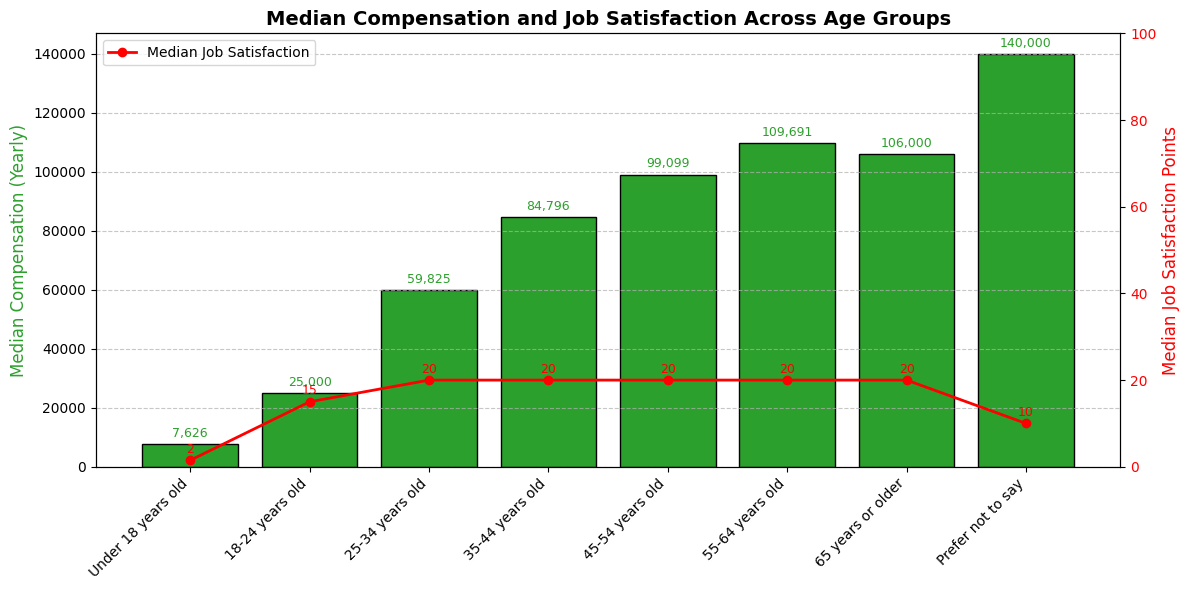

In [13]:
# Group by Age and calculate median for compensation and job satisfaction
median_scores = df.groupby('Age', observed=False)[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Reorder index to move 'Under 18 years old' to the far left
age_order = ['Under 18 years old'] + [age for age in median_scores.index if age != 'Under 18 years old']
median_scores = median_scores.reindex(age_order)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot median compensation as bars
bars = ax1.bar(range(len(median_scores)), median_scores['ConvertedCompYearly'], color='#2ca02c', edgecolor='black')
ax1.set_ylabel("Median Compensation (Yearly)", fontsize=12, color='#2ca02c')

# Set x-ticks and labels properly
ax1.set_xticks(range(len(median_scores)))
ax1.set_xticklabels(median_scores.index, rotation=45, ha='right', fontsize=10)

# Format y-axis for full numbers
from matplotlib.ticker import ScalarFormatter
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.yaxis.get_major_formatter().set_useOffset(False)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate median compensation values on top of bars
for i, value in enumerate(median_scores['ConvertedCompYearly']):
    ax1.text(i, value + max(median_scores['ConvertedCompYearly'])*0.01, f"{int(value):,}", ha='center', va='bottom', fontsize=9, color='#2ca02c')

# Create secondary y-axis for job satisfaction
ax2 = ax1.twinx()
line = ax2.plot(range(len(median_scores)), median_scores['JobSatPoints_6'], color='red', marker='o', linewidth=2, label='Median Job Satisfaction')
ax2.set_ylabel("Median Job Satisfaction Points", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Annotate median job satisfaction values next to markers
for i, value in enumerate(median_scores['JobSatPoints_6']):
    ax2.text(i, value + 1, f"{value:.0f}", ha='center', va='bottom', fontsize=9, color='red')

# Add title and legend
plt.title("Median Compensation and Job Satisfaction Across Age Groups", fontsize=14, weight='bold')
ax2.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


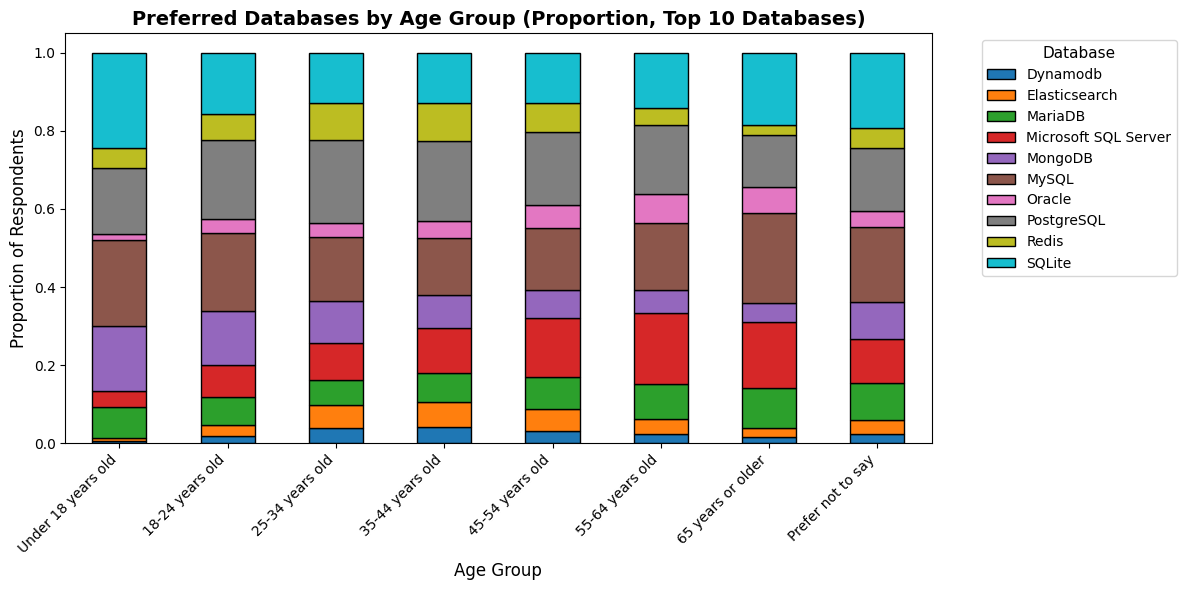

In [14]:
# Split multiple databases and explode into separate rows
df_exploded = df.copy()
df_exploded['DatabaseHaveWorkedWith'] = df_exploded['DatabaseHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('DatabaseHaveWorkedWith')

# Remove any leading/trailing spaces
df_exploded['DatabaseHaveWorkedWith'] = df_exploded['DatabaseHaveWorkedWith'].str.strip()

# Count respondents by Age and Database
db_counts = df_exploded.groupby(['Age', 'DatabaseHaveWorkedWith'], observed=False).size().reset_index(name='Count')

# Get top 10 most popular databases overall
top_dbs = db_counts.groupby('DatabaseHaveWorkedWith')['Count'].sum().nlargest(10).index

# Filter to keep only top databases
db_counts_top = db_counts[db_counts['DatabaseHaveWorkedWith'].isin(top_dbs)]

# Pivot the data to have databases as columns and Age groups as rows
db_pivot = db_counts_top.pivot(index='Age', columns='DatabaseHaveWorkedWith', values='Count').fillna(0)

# Reorder Age groups to move 'Under 18 years old' to the far left
age_order = ['Under 18 years old'] + [age for age in db_pivot.index if age != 'Under 18 years old']
db_pivot = db_pivot.reindex(age_order)

# Normalize to get proportion per age group
db_pivot_prop = db_pivot.div(db_pivot.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = db_pivot_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    edgecolor='black',
    colormap='tab10'
)

# Enhance labels and title
plt.title("Preferred Databases by Age Group (Proportion, Top 10 Databases)", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


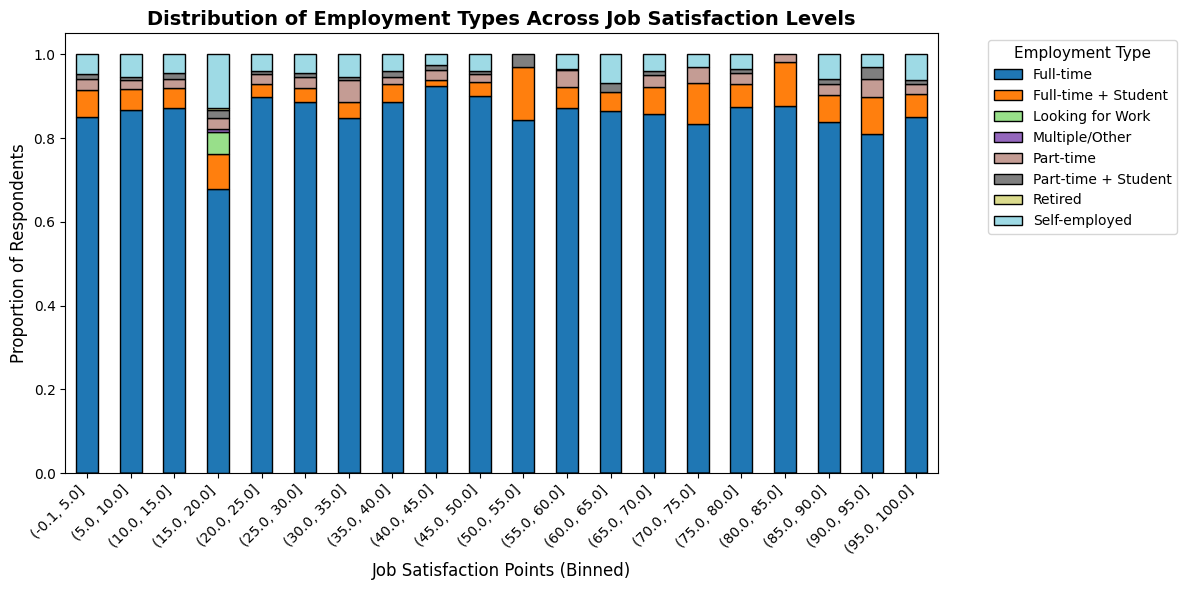

In [15]:
# For this chart I will use the column "EmploymentCategory" on df_empcat

# Make a copy to avoid warnings
df_plot = df_empcat.copy()

# Bin JobSatPoints_6 into 20 bins for granularity
df_plot['JobSat_bin'] = pd.cut(df_plot['JobSatPoints_6'], bins=20)

# Count respondents by JobSat_bin and EmploymentCategory
employment_counts = df_plot.groupby(['JobSat_bin', 'EmploymentCategory'], observed=False).size().reset_index(name='Count')

# Pivot to have EmploymentCategory as columns
employment_pivot = employment_counts.pivot(index='JobSat_bin', columns='EmploymentCategory', values='Count').fillna(0)

# Normalize to proportions per JobSat_bin
employment_pivot_prop = employment_pivot.div(employment_pivot.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = employment_pivot_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    edgecolor='black',
    colormap='tab20'
)

# Enhance labels and title
plt.title("Distribution of Employment Types Across Job Satisfaction Levels", fontsize=14, weight='bold')
plt.xlabel("Job Satisfaction Points (Binned)", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


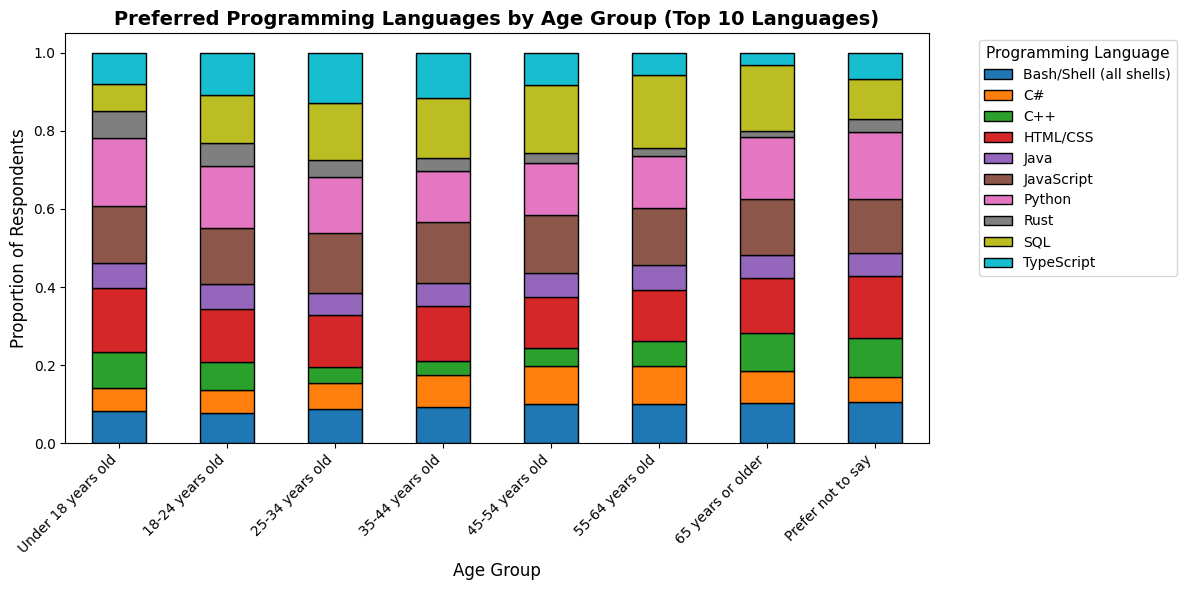

In [16]:
# Make a copy of the dataframe
df_lang = df.copy()

# Split multiple languages and explode
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';')
df_lang = df_lang.explode('LanguageAdmired')
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.strip()

# Count respondents by Age and LanguageAdmired
lang_counts = df_lang.groupby(['Age', 'LanguageAdmired'], observed=False).size().reset_index(name='Count')

# Get top 10 most popular languages overall
top_langs = lang_counts.groupby('LanguageAdmired')['Count'].sum().nlargest(10).index

# Filter to keep only top languages
lang_counts_top = lang_counts[lang_counts['LanguageAdmired'].isin(top_langs)]

# Pivot the data to have languages as columns and Age groups as rows
lang_pivot = lang_counts_top.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

# Reorder Age groups to move 'Under 18 years old' to the far left
age_order = ['Under 18 years old'] + [age for age in lang_pivot.index if age != 'Under 18 years old']
lang_pivot = lang_pivot.reindex(age_order)

# Normalize to get proportion per age group
lang_pivot_prop = lang_pivot.div(lang_pivot.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = lang_pivot_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    edgecolor='black',
    colormap='tab10'
)

# Enhance labels and title
plt.title("Preferred Programming Languages by Age Group (Top 10 Languages)", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


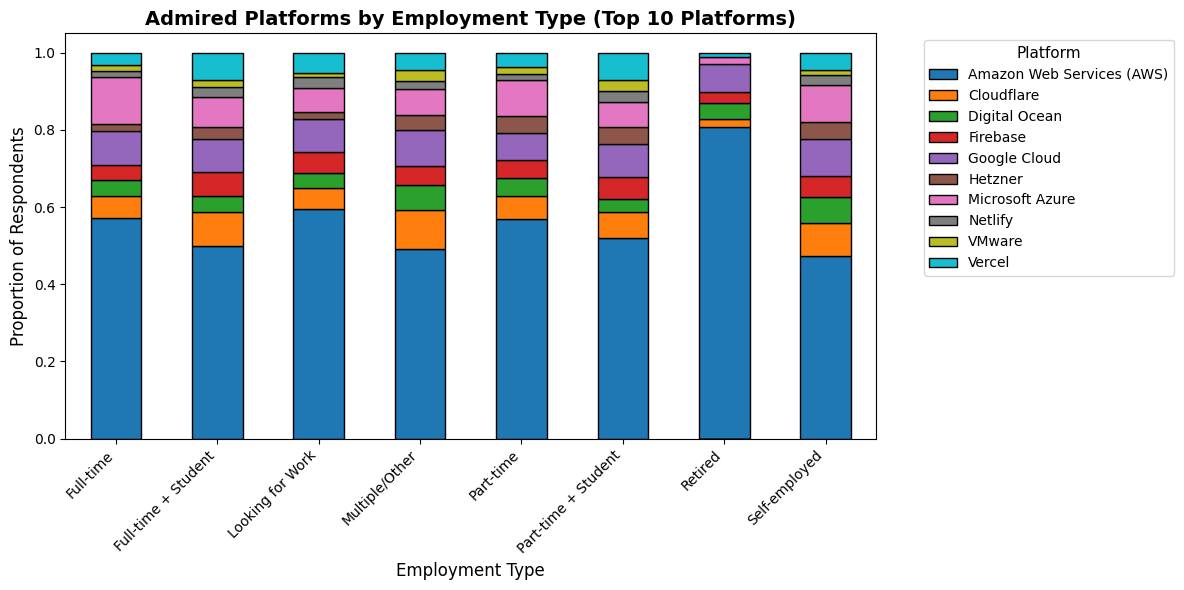

In [17]:
# Make a copy of the dataframe
df_platform = df_empcat.copy()

# Split multiple platforms and explode
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.strip()

# Count respondents by EmploymentCategory and PlatformAdmired
platform_counts = df_platform.groupby(['EmploymentCategory', 'PlatformAdmired'], observed=False).size().reset_index(name='Count')

# Get top 10 most admired platforms overall
top_platforms = platform_counts.groupby('PlatformAdmired')['Count'].sum().nlargest(10).index

# Filter to keep only top platforms
platform_counts_top = platform_counts[platform_counts['PlatformAdmired'].isin(top_platforms)]

# Pivot the data to have platforms as columns and Employment types as rows
platform_pivot = platform_counts_top.pivot(index='EmploymentCategory', columns='PlatformAdmired', values='Count').fillna(0)

# Normalize to get proportion per EmploymentCategory
platform_pivot_prop = platform_pivot.div(platform_pivot.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = platform_pivot_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    edgecolor='black',
    colormap='tab10'
)

# Enhance labels and title
plt.title("Admired Platforms by Employment Type (Top 10 Platforms)", fontsize=14, weight='bold')
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, I will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
